# Week 01 NVDA Stock Analysis for 5 Years

Stock: NVDA
- Basic information
- Historical data for the last 5 years with a precision of 1 day
- Annual and quarterly detailed financial reports for the last 5 years
- Balance sheets for the last 5 years
- Annual and quarterly cash flows for the last 5 years

In [1]:
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from data_extraction.fetch_data import DailyStockDataLoader, FundamentalDataLoader

load_dotenv()
ticker = 'NVDA'

Basic test from [alpha_vantage github homepage](https://github.com/RomelTorres/alpha_vantage?tab=readme-ov-file) 

## Basic Information

In [2]:
fd_loader = FundamentalDataLoader()
overview_df = fd_loader.get_company_overview(ticker)
overview_df

,0
Symbol,NVDA
AssetType,Common Stock
Name,NVIDIA Corporation
Description,Nvidia Corporation is an American multinationa...
CIK,1045810
Exchange,NASDAQ
Currency,USD
Country,USA
Sector,MANUFACTURING
Industry,SEMICONDUCTORS & RELATED DEVICES


## Historical data for the last 5 years with a precision of 1 day

No new data available for NVDA.


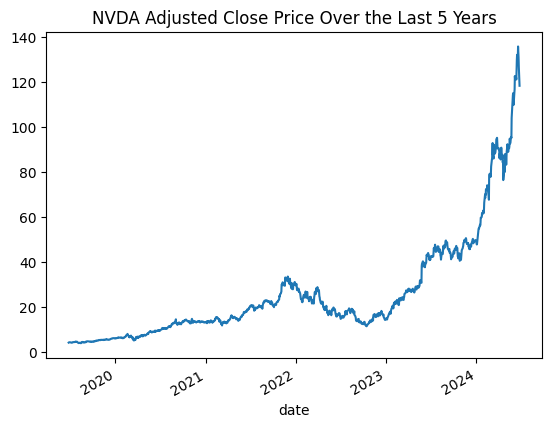

In [3]:
# Load daily stock data
ts_loader = DailyStockDataLoader()
data_last_5_years = ts_loader.load_daily_row_stock_data('NVDA')

# Plot the closing price
data_last_5_years['adjusted_close'].plot(
    title='NVDA Adjusted Close Price Over the Last 5 Years')
plt.show()

## Annual and quarterly detailed financial reports for the last 5 years

In [2]:
financial_reports = ['income_statement', 'balance_sheet', 'cash_flow']

fd_loader = FundamentalDataLoader()

for report in financial_reports:
    fd_loader.load_financial_reports(ticker, 'annual', report)
    fd_loader.load_financial_reports(ticker, 'quarterly', report)

No new data available for NVDA annual income_statement.
No new data available for NVDA quarterly income_statement.
No new data available for NVDA annual balance_sheet.
No new data available for NVDA quarterly balance_sheet.
No new data available for NVDA annual cash_flow.
No new data available for NVDA quarterly cash_flow.
